In [92]:
import sympy as sp
alpha, beta = sp.symbols("alpha beta", real=True)
B = sp.Matrix([[0, -1],[alpha, -1]])
C = sp.Matrix([[0, 1], [0, 1-beta]])
omega = sp.symbols("omega", complex=True)
D = B + C * omega

eigs = list(D.eigenvals().keys())


k, N = sp.symbols("k N", integer=True)
w = sp.exp(sp.I * 2 * sp.pi * k/N)

In [93]:
import numpy as np
import matplotlib.pyplot as plt


# k in [0,N-1]
# theta = k/N in [0,1[

n = 3
ks = list(np.arange(n))
for ki in ks:
    print("---\nk=",ki,)
    choices = {alpha:1,beta:1,k:ki,N:n}
    for eig in eigs:
        display(eig.subs(omega,w).subs(choices).evalf())

---
k= 0


-1.00000000000000

0

---
k= 1


-0.867893077248373 - 1.1770069312826*I

-0.132106922751627 + 1.1770069312826*I

---
k= 2


-0.867893077248373 + 1.1770069312826*I

-0.132106922751627 - 1.1770069312826*I

Text(0.5, 0, 'theta')

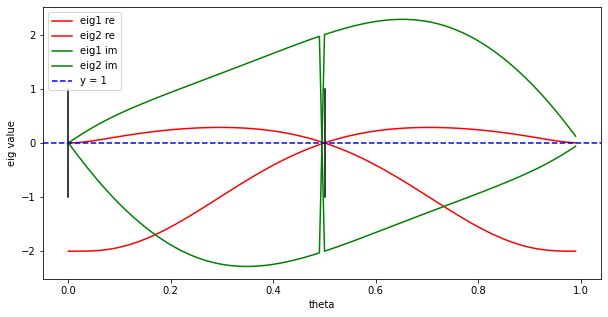

In [173]:
n = 100
thetas = np.linspace(0,1,n+1)[:-1]


theta = sp.Symbol("theta", complex=True)
w = sp.exp(sp.I * 2 * sp.pi * theta)


eigenvals = {"eig1":{"re":[],"im":[]},
             "eig2":{"re":[],"im":[]}}

for tet in thetas:
    choices = {alpha:2,beta:2,theta:tet}
    for key,eig in zip(eigenvals.keys(),eigs):
        val = eig.subs(omega,w).subs(choices).evalf()
        eigenvals[key]["re"] += [sp.re(val)]
        eigenvals[key]["im"] += [sp.im(val)]

fig,ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(thetas,eigenvals["eig1"]["re"],label="eig1 re",c="r")
ax.plot(thetas,eigenvals["eig2"]["re"],label="eig2 re",c="r")
ax.plot(thetas,eigenvals["eig1"]["im"],label="eig1 im",c="g")
ax.plot(thetas,eigenvals["eig2"]["im"],label="eig2 im",c="g")

NN = 2
vals = np.linspace(0,1,NN+1)[:-1]

for val in vals:
    ax.plot((val,val),(-1,1),c="black")


ax.axhline(0, color='b', linestyle='--', linewidth=1.5, label="y = 1")
ax.legend()
ax.set_ylabel("eig value")
ax.set_xlabel("theta")
